# **NSFW Classifier - Testing MobileNet V2**

## **Purpose**

The aim of this notebook is to evaluate transfer learning with MobileNet V2 for the NSFW classification task, as an example of a modern light-weight architecture designed for use on edge devices.

The dataset and hyperparameters used are identical to those used in all the other experiments where data augmentation was used.

Similar to Squeezenet, the time it took for the training loss to converge was somewhat longer compared to ResNet50. In terms of accuracy, MobileNet V2 reaches 95-96%, same as ResNet50.

As a next step, it would be interesting to compare inference speed between Mobilenet V2 and ResNet50.

## Setting up the environment

In [ ]:
# Setup Fastai Colab environment
!pip install -Uqq fastbook
!pip install fastcore==1.2
import fastbook
fastbook.setup_book()

In [2]:
from fastbook import *
from fastai.vision.all import *
import os

# Some files got mildly corruped during upload to Google Drive.
# This helps avoids some problems down the line
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [10]:
# Set random seed for reproducibility

seed = 42

# python RNG
import random
random.seed(seed)

# pytorch RNGs
import torch
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
if torch.cuda.is_available(): torch.cuda.manual_seed_all(seed)

# numpy RNG
import numpy as np
np.random.seed(seed)

In [11]:
# Verify image folder location
os.listdir("../content/gdrive/My Drive/Datasets")

['NSFW', 'SFW']

In [12]:
# Create Path object to image folders
path=Path("../content/gdrive/My Drive/Datasets")
path.ls()

(#2) [Path('../content/gdrive/My Drive/Datasets/NSFW'),Path('../content/gdrive/My Drive/Datasets/SFW')]

In [13]:
print('total NSFW images:', len(os.listdir(os.path.join(path, "NSFW"))))
print('total SFW images:', len(os.listdir(os.path.join(path, "SFW"))))

total NSFW images: 3059
total SFW images: 3110


## Setting up the image dataloader

In [14]:
# Define input params for data block 

# This sets up a train/validate split of 80/20
splitter=RandomSplitter(valid_pct=0.2, seed=seed) 
# MobileNetV2 requires an input size of (224, 224, 3)
item_tfms = [Resize(460)]
batch_tfms=aug_transforms(size=224, min_scale=0.75)

In [15]:
# Create blueprint for dataloader
data_block = DataBlock(
                  blocks=[ImageBlock, CategoryBlock],
                  get_items=get_image_files,
                  get_y=parent_label,
                  splitter=splitter,
                  item_tfms=item_tfms,
                  batch_tfms=batch_tfms)

In [16]:
# Create dataloader with batch size = 64 
dls = data_block.dataloaders(path, bs=64)

In [ ]:
# Run this cell at your own peril!
dls.show_batch()

## Training 

In [17]:
# Prevents getting disconnected, use only when training in Colab
%%javascript
function ClickConnect(){
console.log("Working");
document.querySelector("colab-toolbar-button#connect").click()
}setInterval(ClickConnect, 60000)

<IPython.core.display.Javascript object>

In [21]:
# MobileNetV2
import torchvision.models as models
mobilenet = models.mobilenet_v2

In [22]:
learn = cnn_learner(dls, mobilenet, cut=-1, metrics=[accuracy])
learn.fine_tune(20, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.402420,0.253548,0.918897,16:53


epoch,train_loss,valid_loss,accuracy,time
0,0.228450,0.145993,0.950527,01:39
1,0.187790,0.136391,0.952149,01:41
2,0.163290,0.131918,0.954582,01:42
3,0.153991,0.137443,0.952149,01:43
4,0.130056,0.130418,0.950527,01:43
5,0.134295,0.139145,0.948094,01:44
6,0.120750,0.127219,0.952960,01:43
7,0.114406,0.126215,0.950527,01:44
8,0.108290,0.125822,0.954582,01:43
9,0.092900,0.132410,0.955393,01:42


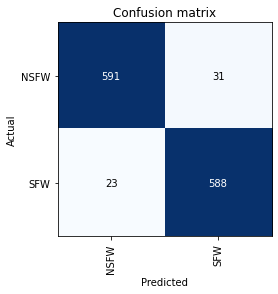

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
# Only for the brave! 
interp.plot_top_losses(9, nrows=3)